# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'matplotlib'

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

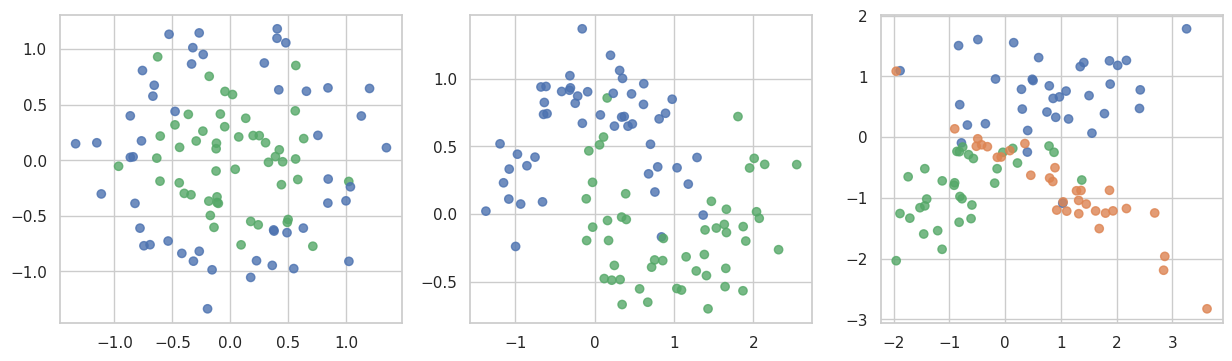

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

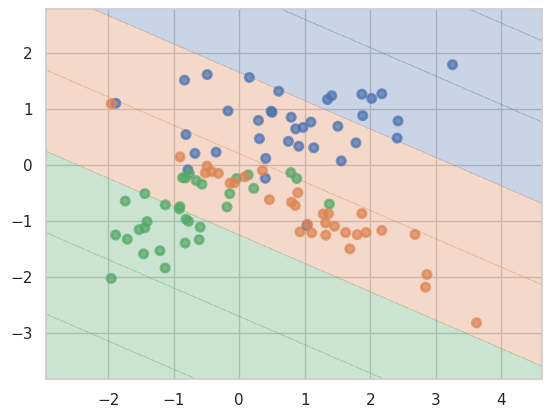

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет 1:
Accuracy на обучающей выборке: 1.00000
Accuracy на тестовой выборке: 0.73333

Датасет 2:
Accuracy на обучающей выборке: 1.00000
Accuracy на тестовой выборке: 0.86667

Датасет 3:
Accuracy на обучающей выборке: 1.00000
Accuracy на тестовой выборке: 0.83333



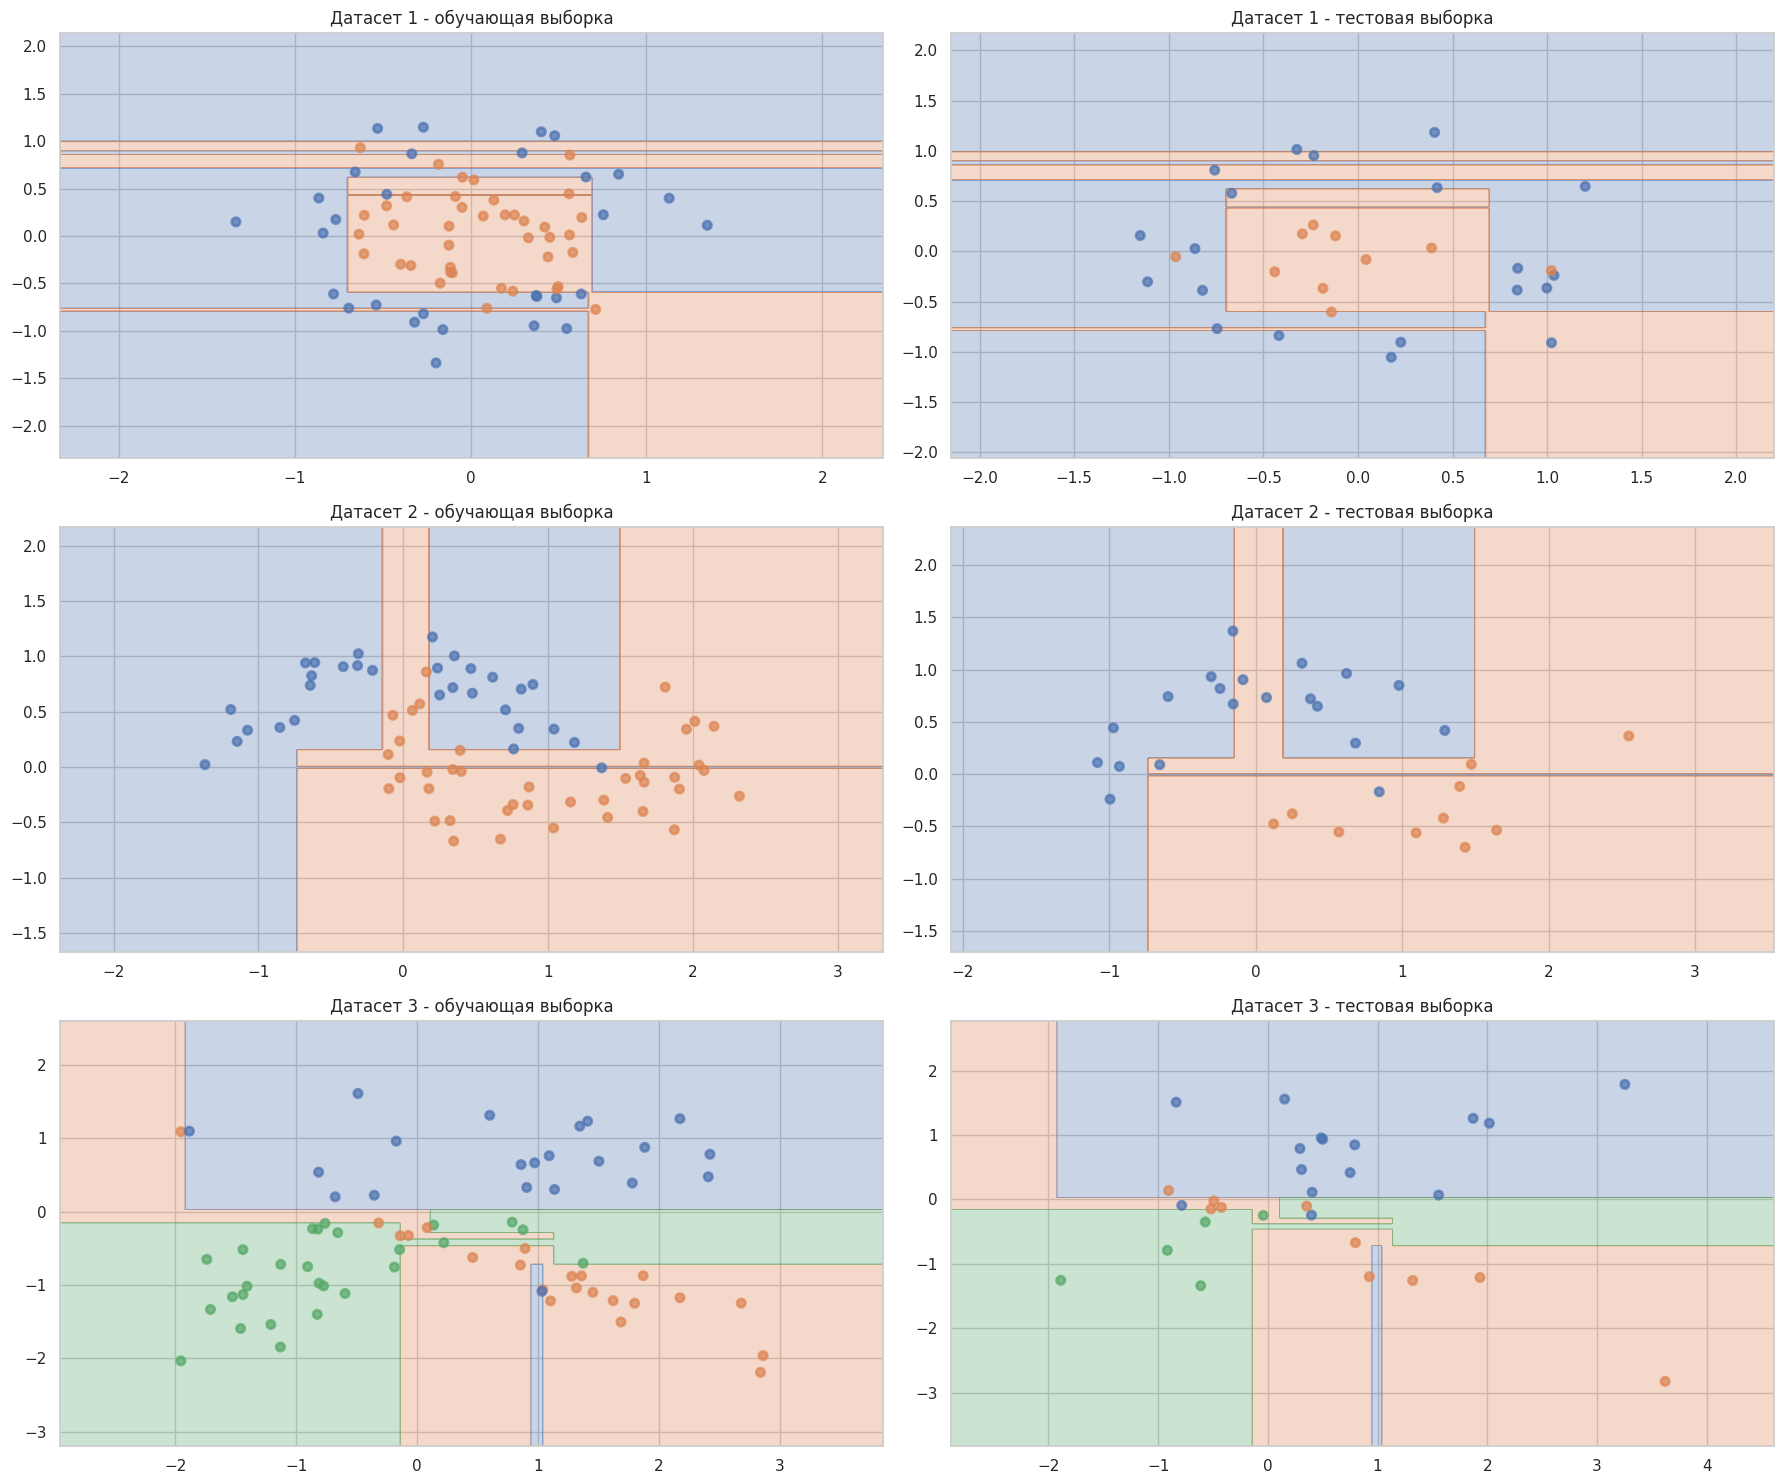

In [8]:
plt.figure(figsize=(18, 15))
for i, (X, y) in enumerate(datasets):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  tree_clf = DecisionTreeClassifier(random_state=42)
  tree_clf.fit(X_train, y_train)

  train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
  test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

  print(f"Датасет {i + 1}:")
  print(f"Accuracy на обучающей выборке: {train_accuracy:.5f}")
  print(f"Accuracy на тестовой выборке: {test_accuracy:.5f}")
  print()

  plt.subplot(3, 2, i*2 + 1)
  plot_surface(tree_clf, X_train, y_train)
  plt.title(f"Датасет {i + 1} - обучающая выборка")

  plt.subplot(3, 2, i*2 + 2)
  plot_surface(tree_clf, X_test, y_test)
  plt.title(f"Датасет {i + 1} - тестовая выборка")

plt.tight_layout()

__Ответ:__ деревья достаточно сильно переобучились, поскольку точность на обучающей выборке  равна 1, а на тестовой выборке значительно ниже.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Датасет 1:
Accuracy на обучающей выборке: 0.87143
Accuracy на тестовой выборке: 0.90000

Датасет 2:
Accuracy на обучающей выборке: 0.95714
Accuracy на тестовой выборке: 0.73333

Датасет 3:
Accuracy на обучающей выборке: 0.90000
Accuracy на тестовой выборке: 0.70000



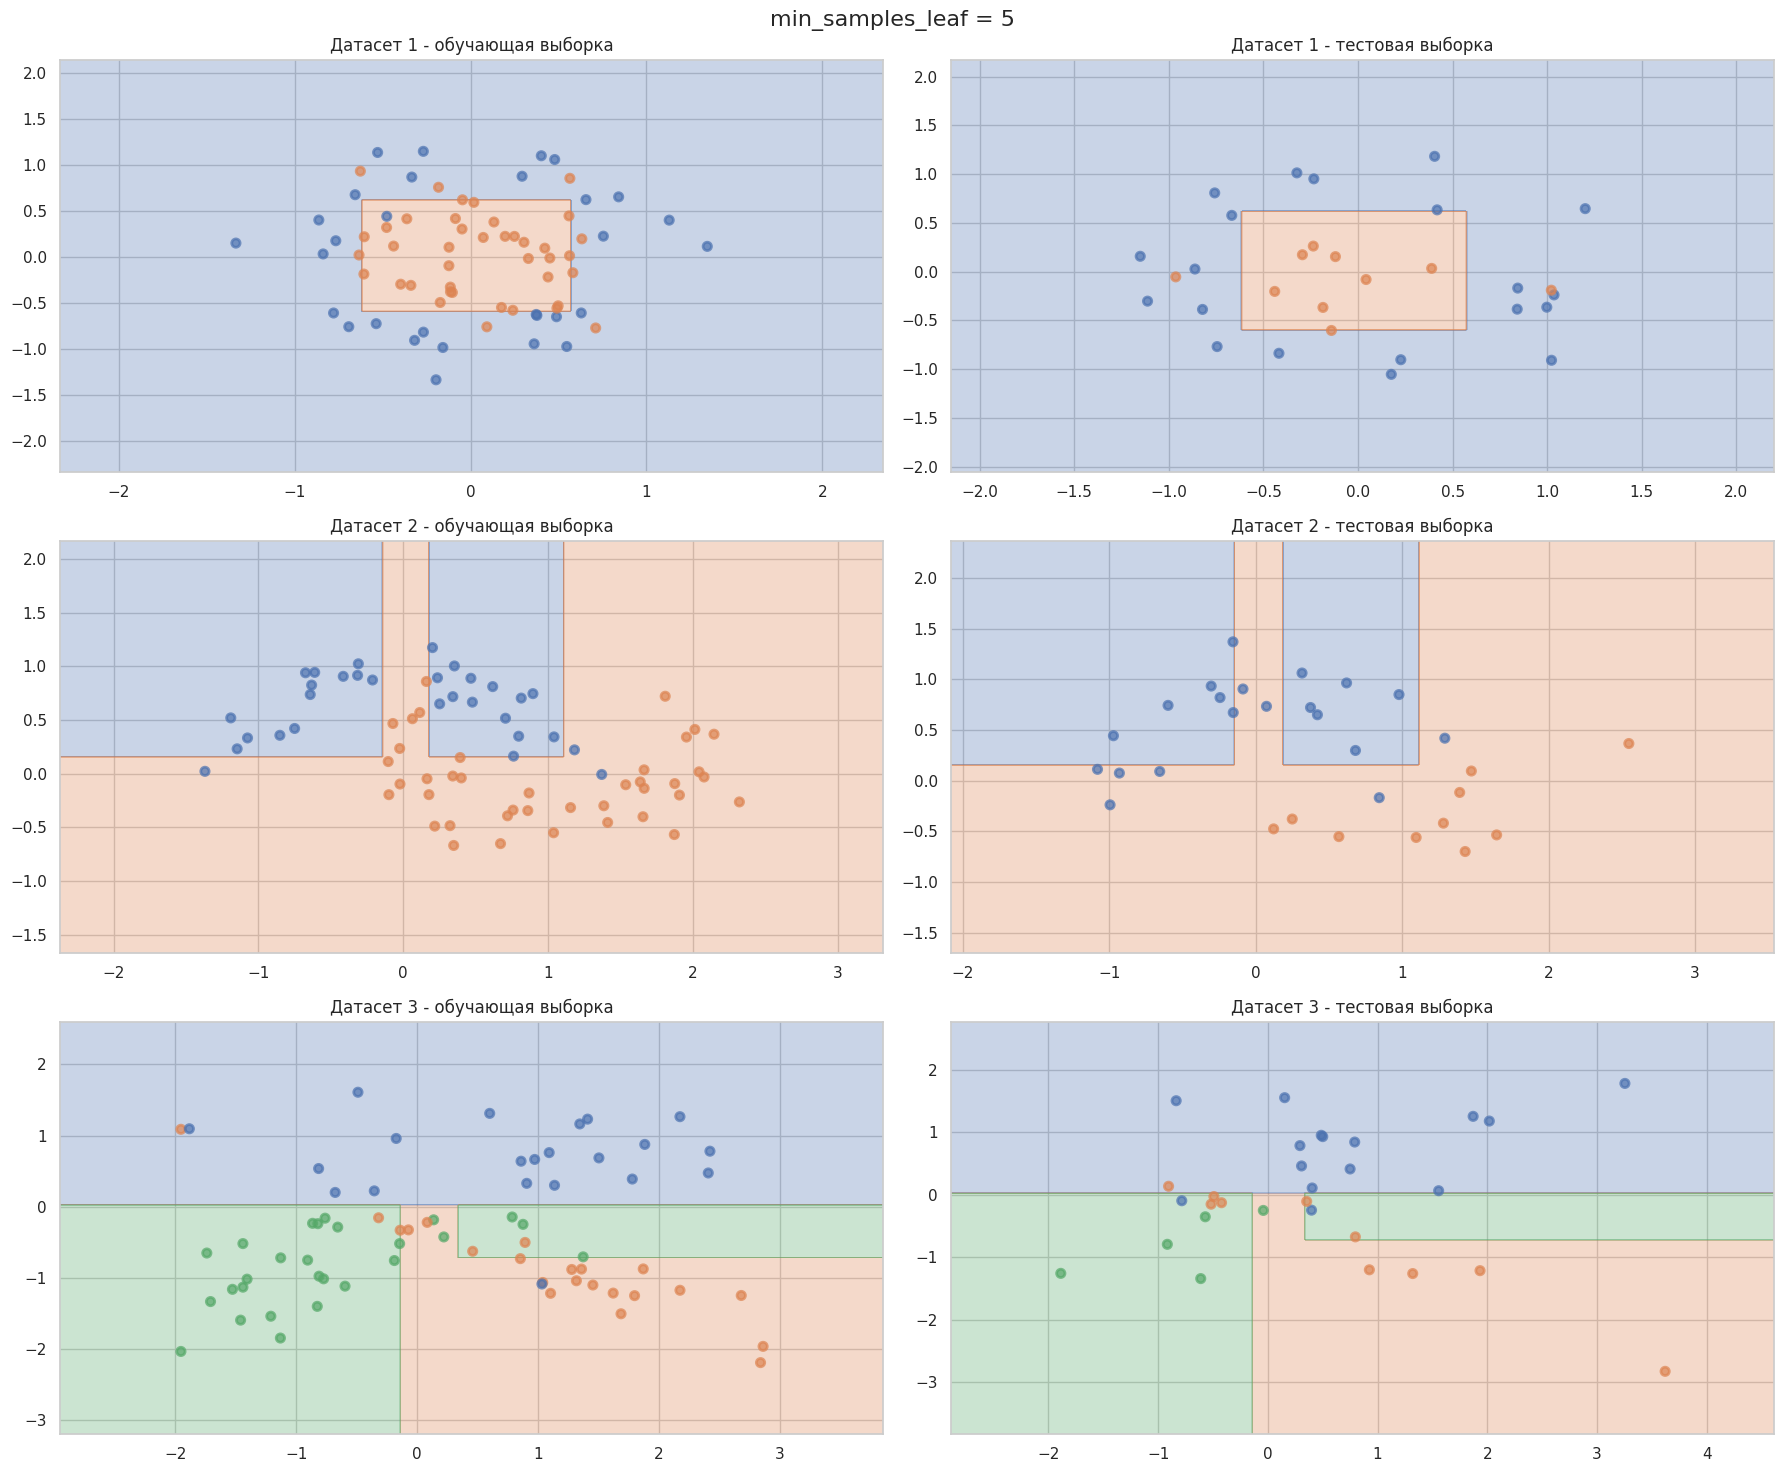

In [9]:
plt.figure(figsize=(18, 15))
for i, (X, y) in enumerate(datasets):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  min_samples_leaf = 5

  tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
  tree_clf.fit(X_train, y_train)

  train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
  test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

  print(f"Датасет {i + 1}:")
  print(f"Accuracy на обучающей выборке: {train_accuracy:.5f}")
  print(f"Accuracy на тестовой выборке: {test_accuracy:.5f}")
  print()

  plt.subplot(3, 2, i*2 + 1)
  plot_surface(tree_clf, X_train, y_train)
  plt.title(f"Датасет {i + 1} - обучающая выборка")

  plt.subplot(3, 2, i*2 + 2)
  plot_surface(tree_clf, X_test, y_test)
  plt.title(f"Датасет {i + 1} - тестовая выборка")

  plt.suptitle(f"min_samples_leaf = {min_samples_leaf}", fontsize=16)

plt.tight_layout()

Датасет 1:
Accuracy на обучающей выборке: 0.82857
Accuracy на тестовой выборке: 0.80000

Датасет 2:
Accuracy на обучающей выборке: 0.87143
Accuracy на тестовой выборке: 0.76667

Датасет 3:
Accuracy на обучающей выборке: 0.88571
Accuracy на тестовой выборке: 0.76667



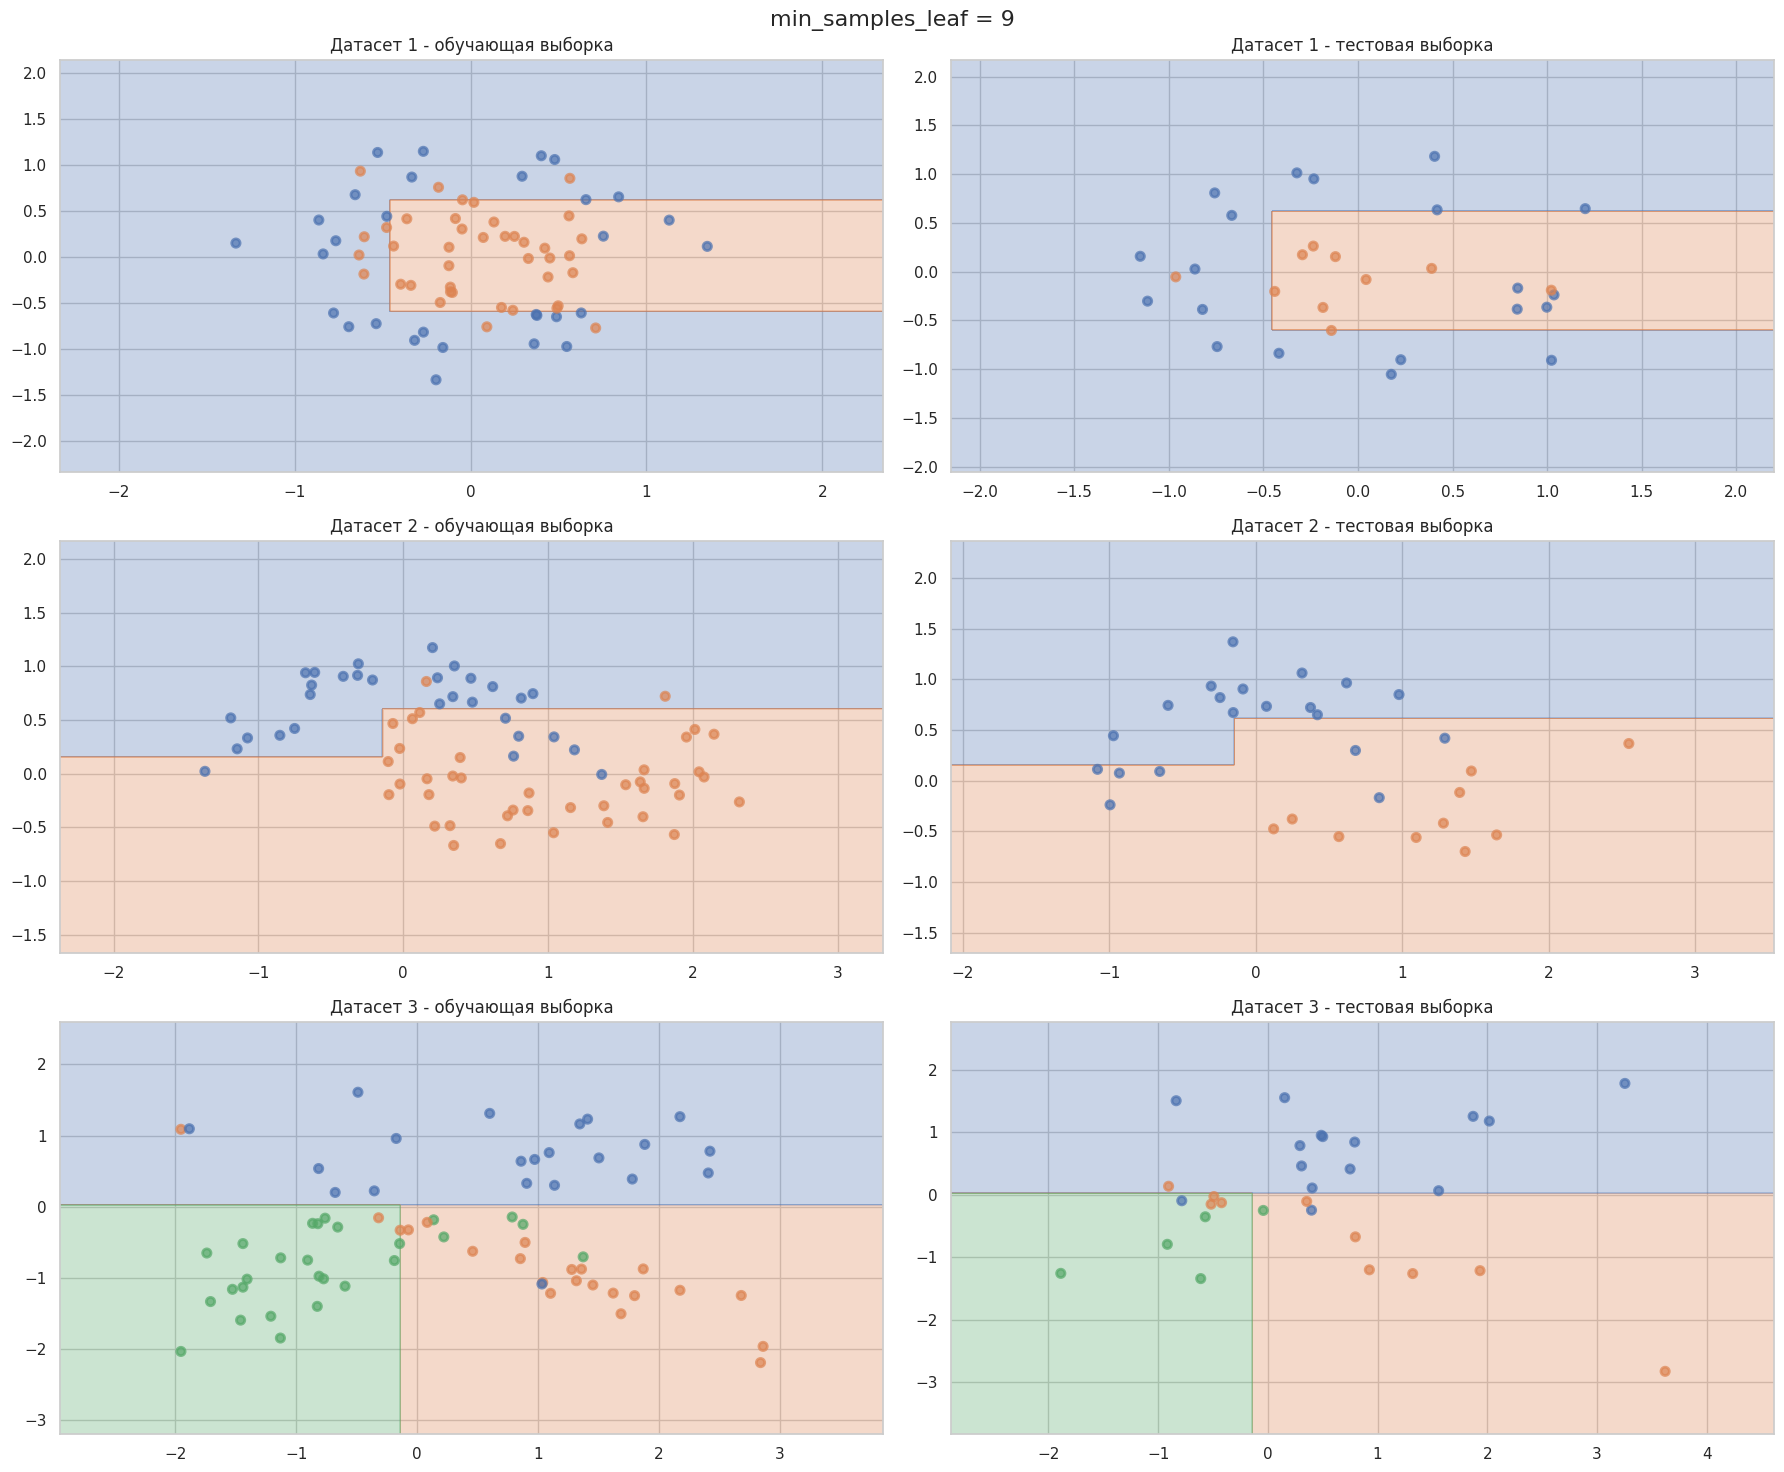

In [10]:
plt.figure(figsize=(18, 15))
for i, (X, y) in enumerate(datasets):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  min_samples_leaf = 9

  tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
  tree_clf.fit(X_train, y_train)

  train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
  test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

  print(f"Датасет {i + 1}:")
  print(f"Accuracy на обучающей выборке: {train_accuracy:.5f}")
  print(f"Accuracy на тестовой выборке: {test_accuracy:.5f}")
  print()

  plt.subplot(3, 2, i*2 + 1)
  plot_surface(tree_clf, X_train, y_train)
  plt.title(f"Датасет {i + 1} - обучающая выборка")

  plt.subplot(3, 2, i*2 + 2)
  plot_surface(tree_clf, X_test, y_test)
  plt.title(f"Датасет {i + 1} - тестовая выборка")

  plt.suptitle(f"min_samples_leaf = {min_samples_leaf}", fontsize=16)

plt.tight_layout()

Датасет 1:
Accuracy на обучающей выборке: 0.88571
Accuracy на тестовой выборке: 0.73333

Датасет 2:
Accuracy на обучающей выборке: 0.91429
Accuracy на тестовой выборке: 0.93333

Датасет 3:
Accuracy на обучающей выборке: 0.94286
Accuracy на тестовой выборке: 0.86667



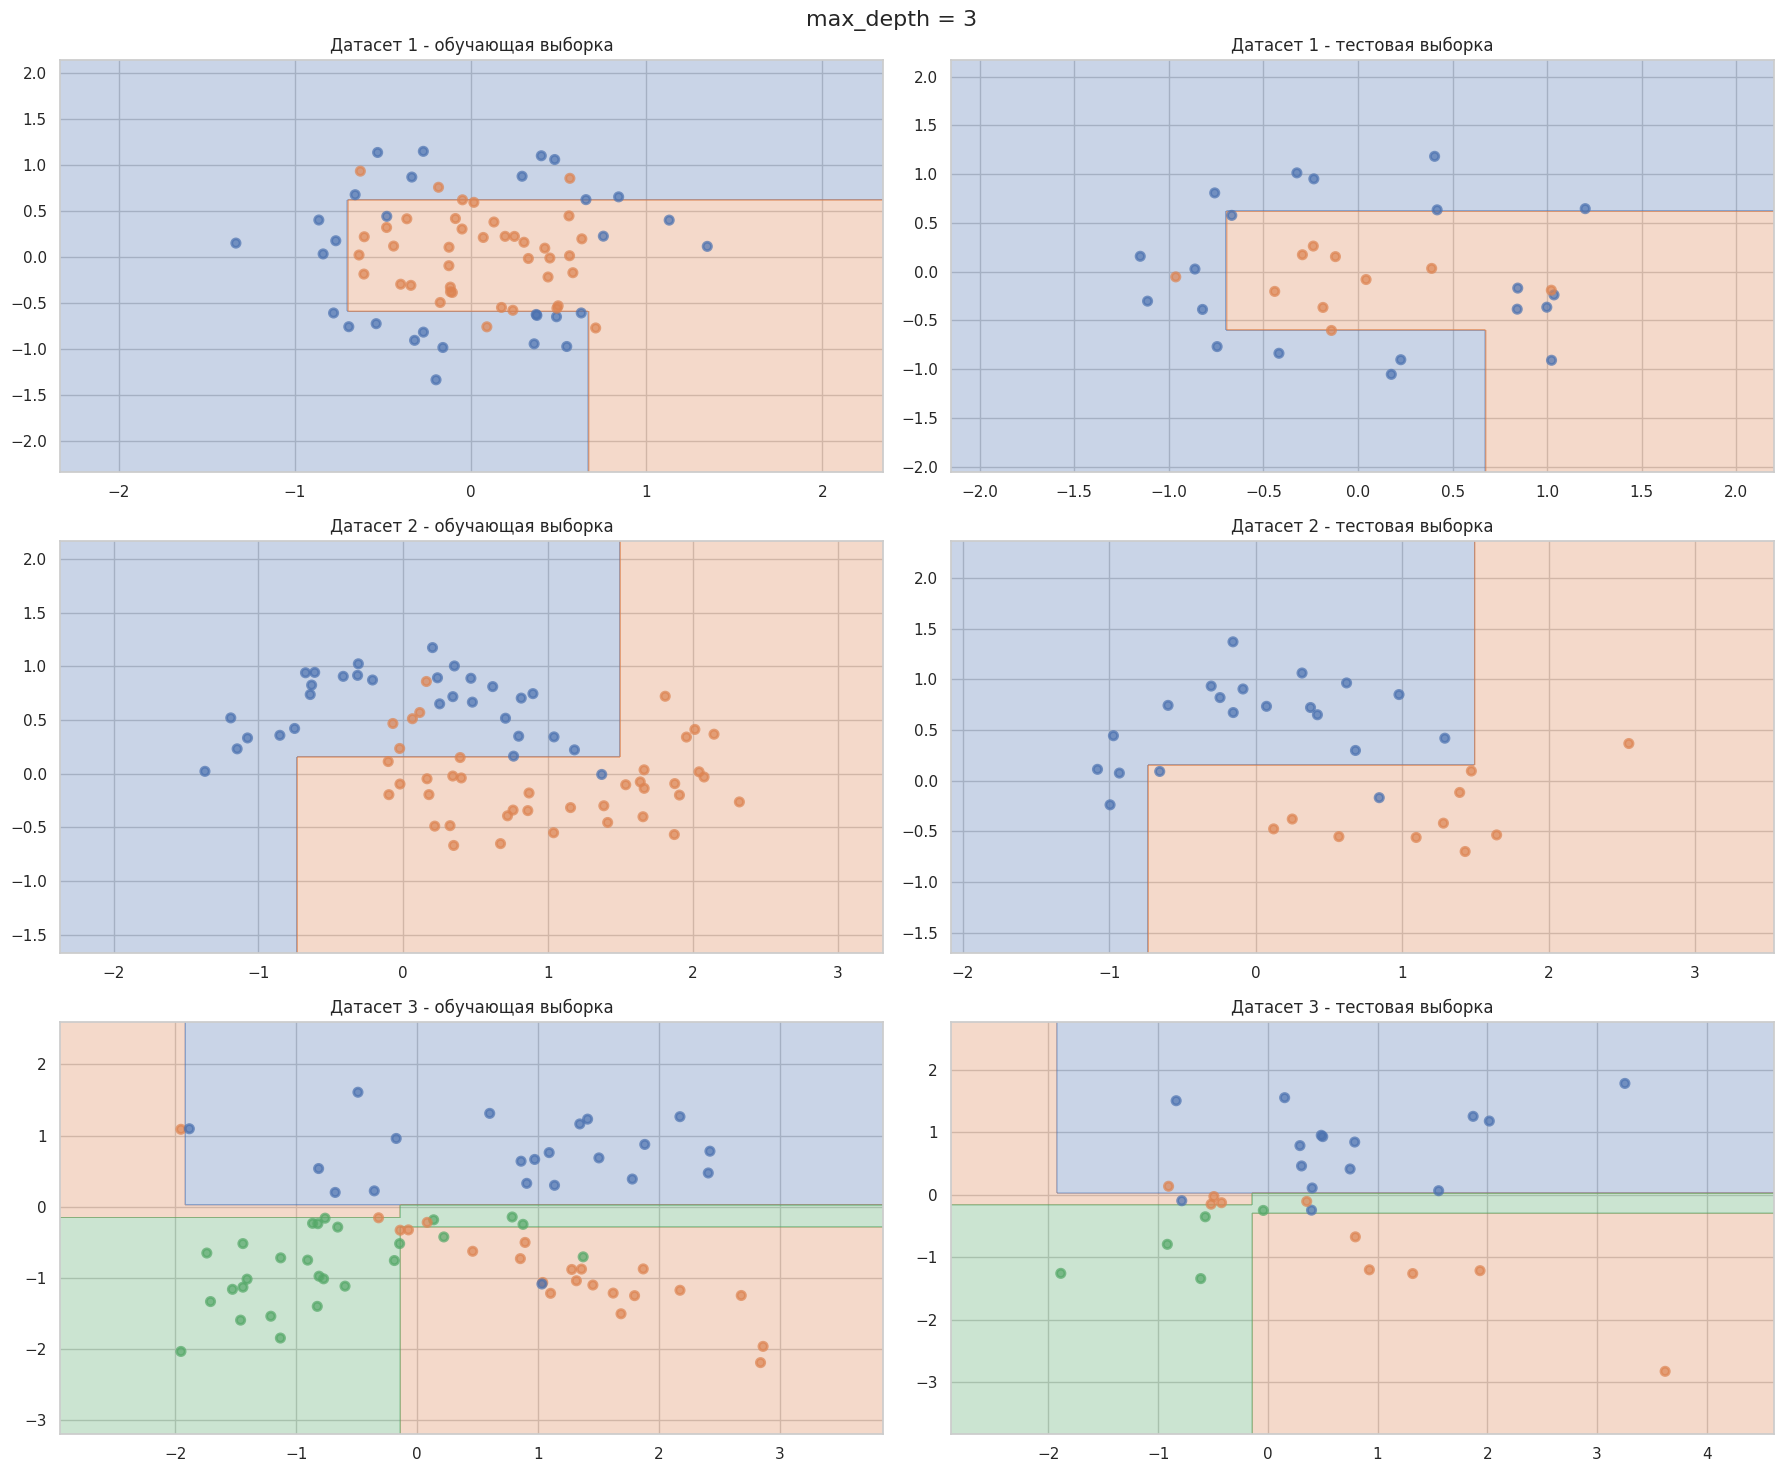

In [11]:
plt.figure(figsize=(18, 15))
for i, (X, y) in enumerate(datasets):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  max_depth = 3

  tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  tree_clf.fit(X_train, y_train)

  train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
  test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

  print(f"Датасет {i + 1}:")
  print(f"Accuracy на обучающей выборке: {train_accuracy:.5f}")
  print(f"Accuracy на тестовой выборке: {test_accuracy:.5f}")
  print()

  plt.subplot(3, 2, i*2 + 1)
  plot_surface(tree_clf, X_train, y_train)
  plt.title(f"Датасет {i + 1} - обучающая выборка")

  plt.subplot(3, 2, i*2 + 2)
  plot_surface(tree_clf, X_test, y_test)
  plt.title(f"Датасет {i + 1} - тестовая выборка")

  plt.suptitle(f"max_depth = {max_depth}", fontsize=16)

plt.tight_layout()

__Ответ:__ увеличение значения параметра min_samples_leaf улучшило результаты для 1 датасета, а уменьшение значения max_depth улучшило результаты для 2 и 3 датасетов. Однако при больших значениях min_samples_leaf деревья переобучаются.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: